### Beats Per Minute (BPM) estimation and validation using different methods

In [1]:
''' 
BPM estimation using different methods and
the validation of BPM from GRGB signal against the ground truth data
'''

' \nBPM estimation using different methods and\nthe validation of BPM from GRGB signal against the ground truth data\n'

In [2]:
'''Program to extract specific ROIs from the video frame. 
Compute the average values of color channels for the selected ROIs.

Mediapipe library is used to detect the face landmarks'''

import cv2
import mediapipe as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Drawing utility
mp_drawing = mp.solutions.drawing_utils

# Load the video file
#video_path = 'dataset/DeepfakeTIMIT/fadg0-original.mov'
#video_path = 'dataset/DeepfakeTIMIT/fram1-original.mov'q
video_path = "dataset/UBFC_2_real/subject8/vid.avi"
#video_path = "dataset/UBFC_PHYS/s3/vid_s3_T1.avi"

cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

#ROI loction points according to the paper by F.Haugg et al. (added additional points in each case)
landmark_head = [107, 66, 69, 67, 109, 10, 338, 297, 299, 296, 336, 9]
landmark_lcheek = [118, 119, 120, 47, 126, 209, 49, 129, 203, 205, 50]
landmark_rcheek = [347, 348, 349, 277, 355, 429, 279, 358, 423, 425, 280]

#Initialise the list of color channels
avg_b = []
avg_g = []
avg_r = []

"""Set the time durtation of video you want to """
#To set the total time duration of video interested in
time_period = 20   #seconds
#Set the value (= total frame - to perform for full length or 0 for any specific time duration)
f_count =  total_frames
#f_count =  0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Face Mesh
    results = face_mesh.process(rgb_frame)
    #print(len(results.multi_face_landmarks))

    # Extract the values of specific ROI with respect to landmark position points
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            #print(len(face_landmarks.landmark))
            '''
            # Extracting landmark coordinates
            h, w, _ = frame.shape
            landmark_coords = []
            for landmark in face_landmarks.landmark:
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                z = landmark.z
                landmark_coords.append((x, y, z))
            '''
            # Extracting specific landmark coordinates
            h, w, _ = frame.shape
            landmark_coords_head = []
            landmark_coords_lcheek = []
            landmark_coords_rcheek = []

            for i, j, k in zip_longest(landmark_head, landmark_lcheek, landmark_rcheek, fillvalue = None):

                if i is not None:
                    landmark_h = face_landmarks.landmark[i]
                    x = int(landmark_h.x * w)
                    y = int(landmark_h.y * h)
                    landmark_coords_head.append((x, y))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x, y), radius=1, color=(0, 0, 0), thickness=1)
                
                if j is not None:

                    landmark_lc = face_landmarks.landmark[j]
                    x1 = int(landmark_lc.x * w)
                    y1 = int(landmark_lc.y * h)
                    landmark_coords_lcheek.append((x1, y1))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x1, y1), radius=1, color=(0, 0, 0), thickness=1)
                
                if k is not None:

                    landmark_rc = face_landmarks.landmark[k]
                    x2 = int(landmark_rc.x * w)
                    y2 = int(landmark_rc.y * h)
                    landmark_coords_rcheek.append((x2, y2))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x2, y2), radius=1, color=(0, 0, 0), thickness=1)
                

            # Determine the bounding box around the specified landmarks -
            # Forehead
            x_coords, y_coords = zip(*landmark_coords_head)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            forehead_roi = frame[y_min:y_max, x_min:x_max]
            forehead_blue = np.mean(forehead_roi[:, :, 0])
            forehead_green = np.mean(forehead_roi[:, :, 1])
            forehead_red = np.mean(forehead_roi[:, :, 2])

            #lcheek
            x_coords, y_coords = zip(*landmark_coords_lcheek)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            lcheek_roi = frame[y_min:y_max, x_min:x_max]
            lcheek_blue = np.mean(lcheek_roi[:, :, 0])
            lcheek_green = np.mean(lcheek_roi[:, :, 1])
            lcheek_red = np.mean(lcheek_roi[:, :, 2])

            #rcheek
            x_coords, y_coords = zip(*landmark_coords_rcheek)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            rcheek_roi = frame[y_min:y_max, x_min:x_max]
            rcheek_blue = np.mean(rcheek_roi[:, :, 0])
            rcheek_green = np.mean(rcheek_roi[:, :, 1])
            rcheek_red = np.mean(rcheek_roi[:, :, 2])

            # Crop the image
            #cropped_image = frame[y_min:y_max, x_min:x_max]
           
            #average = np.mean(forehead_roi[:, :, 0], lcheek_roi[:, :, 0], rcheek_roi[:, :, 0])
            #print(forehead_red, lcheek_red, rcheek_red)
            
            avg_r.append(np.mean([forehead_red, lcheek_red, rcheek_red]))
            avg_g.append(np.mean([forehead_green, lcheek_green, rcheek_green]))
            avg_b.append(np.mean([forehead_blue, lcheek_blue, rcheek_blue]))

            #r, g, b = frame[y_min:y_max, x_min:x_max]
            #print(f"R G B values are : {avg_r}, {avg_g}, {avg_b}")
            '''
            # Display the cropped image in a separate window
            cv2.namedWindow("Cropped_Image", cv2.WINDOW_NORMAL) 
            cv2.resizeWindow("Cropped_Image", 400,200)
            cv2.imshow('Cropped_Image', cropped_image)
            '''
    # Display the frame
    cv2.namedWindow("Face Landmarks", cv2.WINDOW_NORMAL) 
    cv2.resizeWindow("Face Landmarks", 900,650)
    cv2.imshow('Face Landmarks', frame)
    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    # To retrieve no. of frames according to the specified time duration
    if f_count == total_frames:
        continue
    else:
    
        if(f_count/fps >= time_period):
            print("Current frame counts :",f_count)
            break
        else:
            f_count+=1
        
    
print("Total No. of vid frames: ", total_frames)
print("Video FPS: ", fps)

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()
face_mesh.close()


d:\Techlabs\pyvhr\pyvhr-env\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Total No. of vid frames:  2022
Video FPS:  29.888441


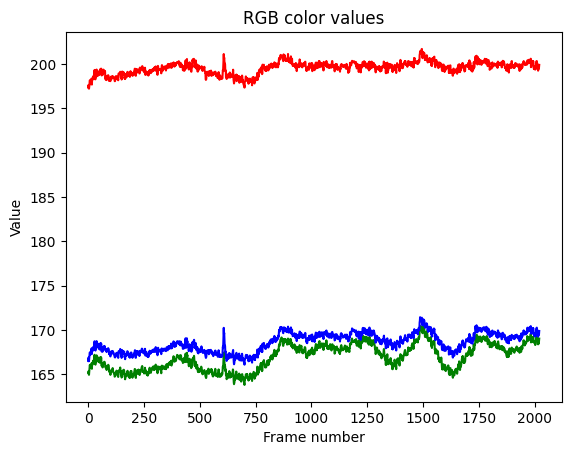

In [3]:
#Plot the color channel values
plt.plot(avg_g, color = 'green')
plt.plot(avg_b, color = 'blue')
plt.plot(avg_r, color = 'red')
plt.title("RGB color values")
plt.xlabel('Frame number')
plt.ylabel('Value')
plt.show()


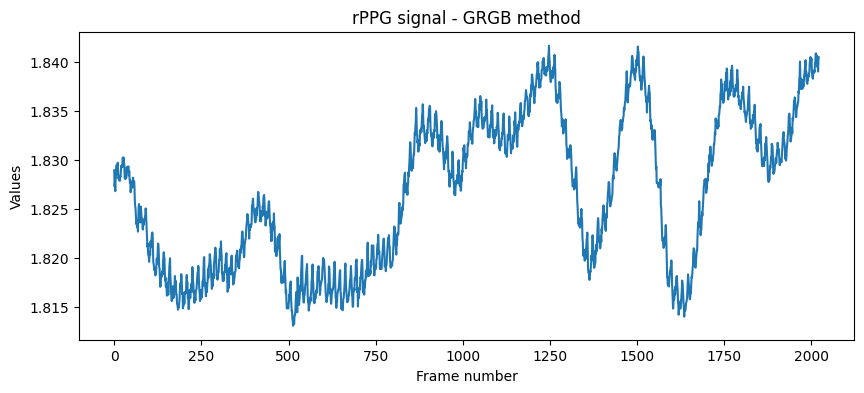

In [4]:
# Calculate the GR-GB values of the frames
#Implementation of the method mentioned in paper by F.Haugg et al.
gr_signal = [a/b for a, b in zip(avg_g, avg_r)]

gb_signal = [a/b for a, b in zip(avg_g, avg_b)]

grgb_signal = [a + b for a , b in zip(gr_signal, gb_signal)]

# Create a copy of the GRGB signal 
norm_rppg_signal = np.copy(grgb_signal)
fs = fps

#Plot the rPPG values against total number of frames

plt.figure(figsize=(10,4))
plt.plot(grgb_signal)
plt.title("rPPG signal - GRGB method")
plt.xlabel('Frame number')
plt.ylabel('Values')
plt.show()

In [5]:
# Normalised value = (value-mean)/standard deviation
norm_rppg_signal = (grgb_signal - np.mean(grgb_signal)) / np.std(grgb_signal)

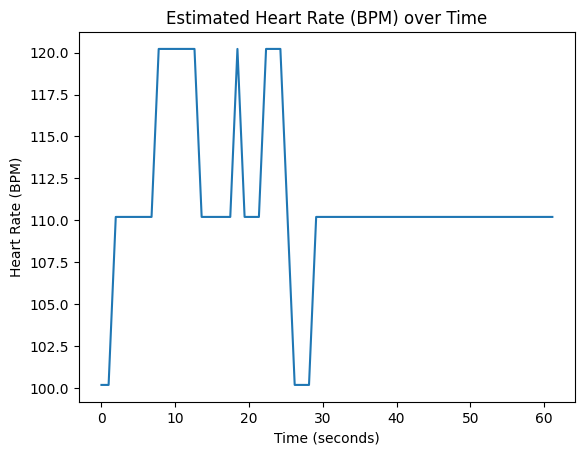

In [6]:
# Estimate the BPM from normalized rPPG signal using sliding window and Welch's method

from scipy.signal import welch
from matplotlib.ticker import MultipleLocator

def calculate_bpm_over_time(rppg_signal, fs, window_length, step_size):
    bpm_values = []
    time_stamps = []
    window_samples = int(window_length * fs)
    step_samples = int(step_size * fs)
    
    for start in range(0, len(rppg_signal) - window_samples + 1, step_samples):
        segment = rppg_signal[start:start + window_samples]
        
        # Compute PSD using Welch's method
        ''' nperseg = step_samples, if you need overlapping regions '''
        freqs, psd = welch(segment, fs, nperseg=window_samples)
        
        # Limit the frequency range to typical heart rate range (0.5 to 4 Hz)
        valid_idx = np.logical_and(freqs >= 0.65, freqs <= 14.0)
        valid_freqs = freqs[valid_idx]
        valid_psd = psd[valid_idx]
        # Find the peak frequency in the valid range
        peak_freq = valid_freqs[np.argmax(valid_psd)]
        
        # Convert the peak frequency to BPM
        bpm = peak_freq * 60
        bpm_values.append(bpm)
        time_stamps.append(start / fs)
    
    return time_stamps, bpm_values


# Calculate BPM from the rPPG signal using a 2-second window with a 1-second step
window_length = 6  # seconds
step_size = 1 # seconds

time_stamps, bpm_values_est = calculate_bpm_over_time(norm_rppg_signal, fs, window_length, step_size)

# Create a plot
fig, ax = plt.subplots()
ax.plot(time_stamps, bpm_values_est)

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_title('Estimated Heart Rate (BPM) over Time')

# Display the plot
plt.show()


In [7]:
#---BPM estimation using pyVHR library. Input is the extracted GRGB signal from video

from pyVHR.extraction.utils import sig_windowing, get_fps
from pyVHR.BVP.filters import apply_filter
from pyVHR.BVP.filters import detrend
from pyVHR.BVP.filters import BPfilter
from pyVHR.BPM.BPM import BVP_to_BPM, multi_est_BPM_median
import matplotlib.pyplot as plt

#Transform the grgb signal to a 3d array
sig = np.array(grgb_signal).reshape(len(grgb_signal),1,1)
#print(sig.shape)

#---Signal computation based on overlapping windows
Ws = 6 # window length in seconds
overlap = 1 # window overlap in seconds
#fps = get_fps(videoFileName)
#Returns a a list of length num_windows of array with shape [num_estimators(num_patches), rgb_channels, window_frames], 
#and a 1D ndarray of times in seconds,where each one is the center of a window.
windowed_sig, timesES = sig_windowing(sig, Ws, overlap, fps) 

#print(len(windowed_sig))
#Transform the windowed_sig to a bvp signal as np.ndarray with shape [num_estimators, num_frames]
bvp = [arr.reshape(arr.shape[0], -1) for arr in windowed_sig]
print(bvp[0].shape)
print(len(bvp))

#---BPM estimation
#Returns a list of length num_windows of BPM signals with shape [num_estimators, ]
bpmES = BVP_to_BPM(bvp, fps, minHz = 0.65, maxHz = 14.0)
# median BPM from multiple estimators BPM
bpm , uncertainity = multi_est_BPM_median(bpmES)


(1, 180)
62


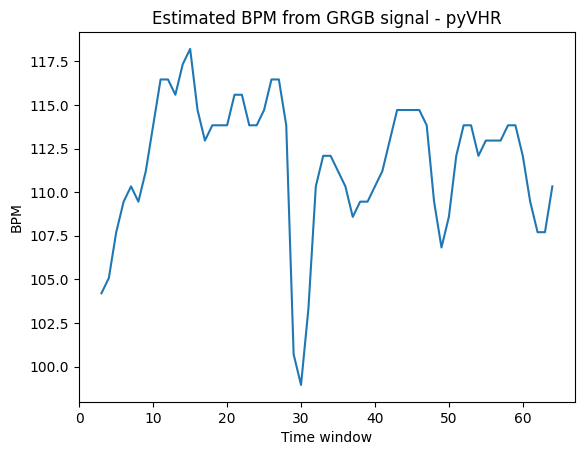

In [8]:
#Plot the estimated BPM using pyVHR
plt.figure()
plt.title("Estimated BPM from GRGB signal - pyVHR")
plt.xlabel("Time window")
plt.ylabel("BPM")
plt.plot(timesES, bpm)
plt.show()

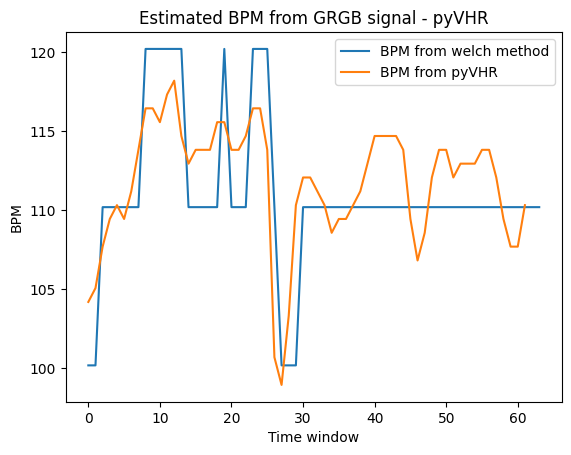

In [9]:
#Plot the estimated BPM from both methods
plt.figure()
plt.title("Estimated BPM from GRGB signal - pyVHR")
plt.xlabel("Time window")
plt.ylabel("BPM")
plt.plot(bpm_values_est, label = 'BPM from welch method')
plt.plot(bpm, label ='BPM from pyVHR')
plt.legend()
plt.show()

### To estimate the BPM from ground truth data............................................

2022


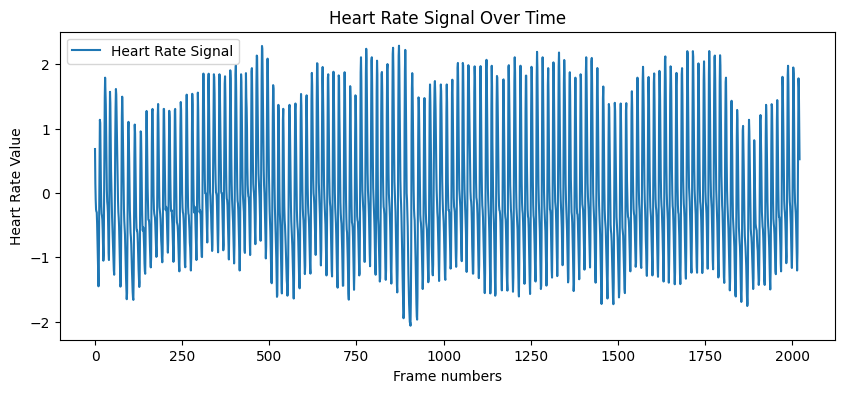

In [10]:

#The ground truth txt file is accessed from the UBFC_2 dataset from Kaggle

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
file_path = 'dataset/UBFC_2/subject8/ground_truth.txt'
data = np.loadtxt(file_path)

# Convert the numpy array to a list
txt_signal = data.tolist()
#Extract the list of data
ref_signal = txt_signal[0]
#ref_signal = ref_signal[0:1521]
print(len(ref_signal))

fs_ref = 29.888441 #sub 8

#Plot the ground truth data  
plt.figure(figsize=(10,4))
plt.plot(ref_signal, label='Heart Rate Signal')
plt.xlabel('Frame numbers')
plt.ylabel('Heart Rate Value')
plt.title('Heart Rate Signal Over Time')
plt.legend()
plt.show()

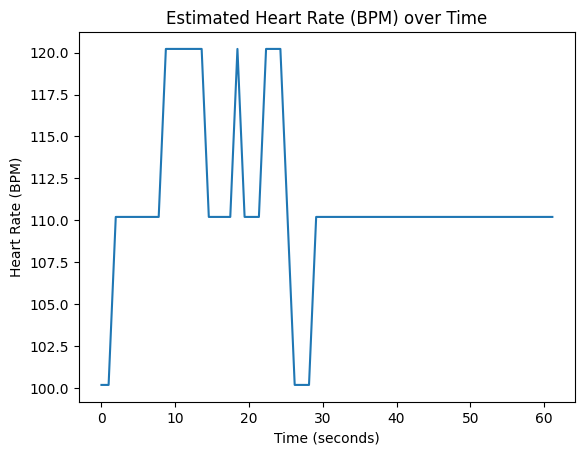

In [11]:
# Estimate the BPM from ground truth signal using sliding window and Welch's method

from scipy.signal import welch
from matplotlib.ticker import MultipleLocator

def calculate_bpm_over_time(rppg_signal, fs, window_length, step_size):
    bpm_values = []
    time_stamps = []
    window_samples = int(window_length * fs)
    step_samples = int(step_size * fs)
    
    for start in range(0, len(rppg_signal) - window_samples + 1, step_samples):
        segment = rppg_signal[start:start + window_samples]
        
        # Compute PSD using Welch's method
        ''' nperseg = step_samples, if you need overlapping regions '''
        freqs, psd = welch(segment, fs, nperseg=window_samples)
        
        # Limit the frequency range to typical heart rate range (0.5 to 4 Hz)
        valid_idx = np.logical_and(freqs >= 0.65, freqs <= 14.0)
        valid_freqs = freqs[valid_idx]
        valid_psd = psd[valid_idx]
        # Find the peak frequency in the valid range
        peak_freq = valid_freqs[np.argmax(valid_psd)]
        
        # Convert the peak frequency to BPM
        bpm = peak_freq * 60
        bpm_values.append(bpm)
        time_stamps.append(start / fs)
    
    return time_stamps, bpm_values

# Calculate BPM from the rPPG signal using a 2-second window with a 1-second step
window_length = 6  # seconds
step_size = 1 # seconds

time_stamps, bpm_values_ref = calculate_bpm_over_time(ref_signal, fs_ref, window_length, step_size)

# Create a plot
fig, ax = plt.subplots()
ax.plot(time_stamps, bpm_values_ref)

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Heart Rate (BPM)')
ax.set_title('Estimated Heart Rate (BPM) over Time')
plt.show()


In [12]:
#---BPM estimation using pyVHR library. Input - Ground truth signal 

from pyVHR.extraction.utils import sig_windowing, get_fps
from pyVHR.BVP.filters import apply_filter
from pyVHR.BVP.filters import detrend
from pyVHR.BVP.filters import BPfilter
from pyVHR.BPM.BPM import BVP_to_BPM, multi_est_BPM_median
import matplotlib.pyplot as plt

#Transform the grgb signal to a 3d array
sig = np.array(ref_signal).reshape(len(ref_signal),1,1)
#print(sig.shape)
fps = fs_ref #subject 4

#---Signal computation based on overlapping windows
Ws = 6 # window length in seconds
overlap = 1 # window overlap in seconds
#fps = get_fps(videoFileName)
#Returns a a list of length num_windows of array with shape [num_estimators(num_patches), rgb_channels, window_frames], 
#and a 1D ndarray of times in seconds,where each one is the center of a window.
windowed_sig, timesES = sig_windowing(sig, Ws, overlap, fps) 

#print(len(windowed_sig))
#Transform the windowed_sig to a bvp signal as np.ndarray with shape [num_estimators, num_frames]
bvp = [arr.reshape(arr.shape[0], -1) for arr in windowed_sig]
print(bvp[0].shape)
print(len(bvp))

#---BPM estimation
#Returns a list of length num_windows of BPM signals with shape [num_estimators, ]
bpmES = BVP_to_BPM(bvp, fps, minHz = 0.65, maxHz = 14.0)
# median BPM from multiple estimators BPM
bpm_gtruth , uncertainity = multi_est_BPM_median(bpmES)


(1, 180)
62


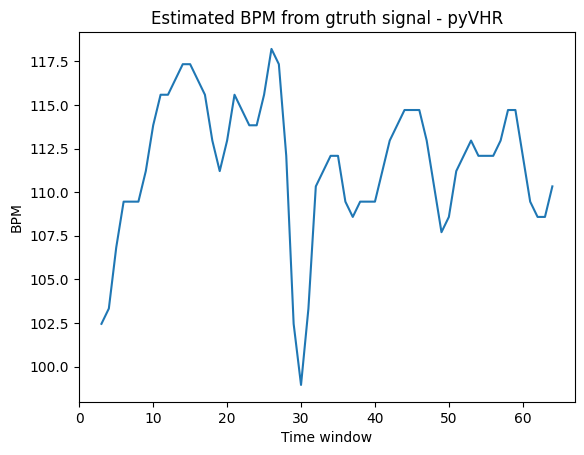

In [13]:
#Plot the estimated BPM using pyVHR
plt.figure()
plt.title("Estimated BPM from gtruth signal - pyVHR")
plt.xlabel("Time window")
plt.ylabel("BPM")
plt.plot(timesES, bpm_gtruth)
plt.show()

#### Comparison of estimated BPM values with the ground truth 

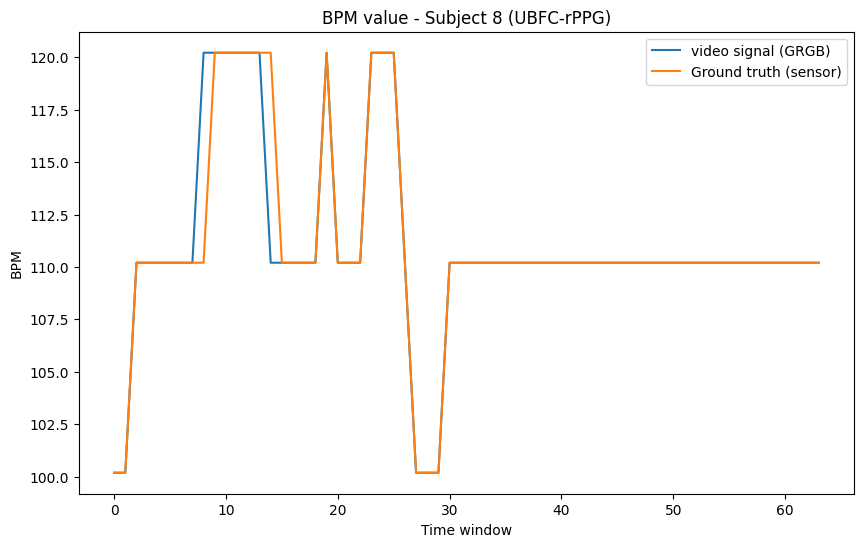

In [14]:
# Plot the estimated BPM 
# Validation of BPM graph with ground truth
plt.figure(figsize=(10,6))
plt.title("BPM value - Subject 8 (UBFC-rPPG)")
plt.xlabel("Time window")
plt.ylabel("BPM")
plt.plot(bpm_values_est, label = 'video signal (GRGB)')
#plt.plot(bpm, label ='GRGB signal - BPM from pyVHR')
#plt.plot(bpm1, label ='Using pyVHR')
#plt.plot(bpm_gtruth, label ='Gtruth using pyVHR')
plt.plot(bpm_values_ref, label = 'Ground truth (sensor)')
plt.legend()
plt.show()